In [1]:
# Very important to have this line!
%matplotlib notebook

from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

from hazma.scalar_mediator import ScalarMediator
from hazma.vector_mediator import VectorMediator
from utilities import get_color, get_tex_label, latex_text_width_1col

base_fig_dim = 7.07

## Setup

In [2]:
mxs = np.logspace(np.log10(50), np.log10(250), 500)
vx = 1e-3

def get_bfs(th):
    """Computes bfs for a model.
    
    Parameters
    ----------
    th : Theory
        Theory object for which to compute the branching fractions.
    
    Returns
    -------
    bfs : dict
        Dictionary containing final states and branching fractions for each mx in mxs.
    """
    # Computes BRs for each DM mass
    bfs_raw = []
    for mx in mxs:
        th.mx = mx
        e_cm = 2. * mx * (1 + 0.5 * vx**2)

        bfs_raw.append(th.annihilation_branching_fractions(e_cm))

    # Convert the list of dicts into a dict of lists
    return {fs: np.array([bf[fs] for bf in bfs_raw])
            for fs in th.list_annihilation_final_states()}

def plot_bfs(ax, bfs):
    """Plots bfs for a model.
    
    Parameters
    ----------
    ax : axes
    bfs : dict
    
    Returns
    -------
    curves : dict
        Dictionary containing final states and corresponding Line2D objects.
    """
    return {fs: ax.plot(mxs, bfs[fs],
                        label=get_tex_label(fs),
                        color=get_color(fs))[0] for fs in bfs.keys()}

## Scalar

In [3]:
sm = ScalarMediator(1e2, 1e3, 1., 1., 1., 1., 246e3)

def update_scalar(ms, gsxx, gsff, gsGG, gsFF, lam, th, curves, fig):
    # Update parameters
    th.ms = ms
    th.gsxx = gsxx
    th.gsff = gsff
    th.gsGG = gsGG
    th.gsFF = gsFF
    th.lam = lam
    
    # Get new branching fractions
    bfs = get_bfs(th)
    
    # Plot them
    for fs in th.list_annihilation_final_states():
        curves[fs].set_ydata(bfs[fs])

    fig.canvas.draw()

<IPython.core.display.Javascript object>


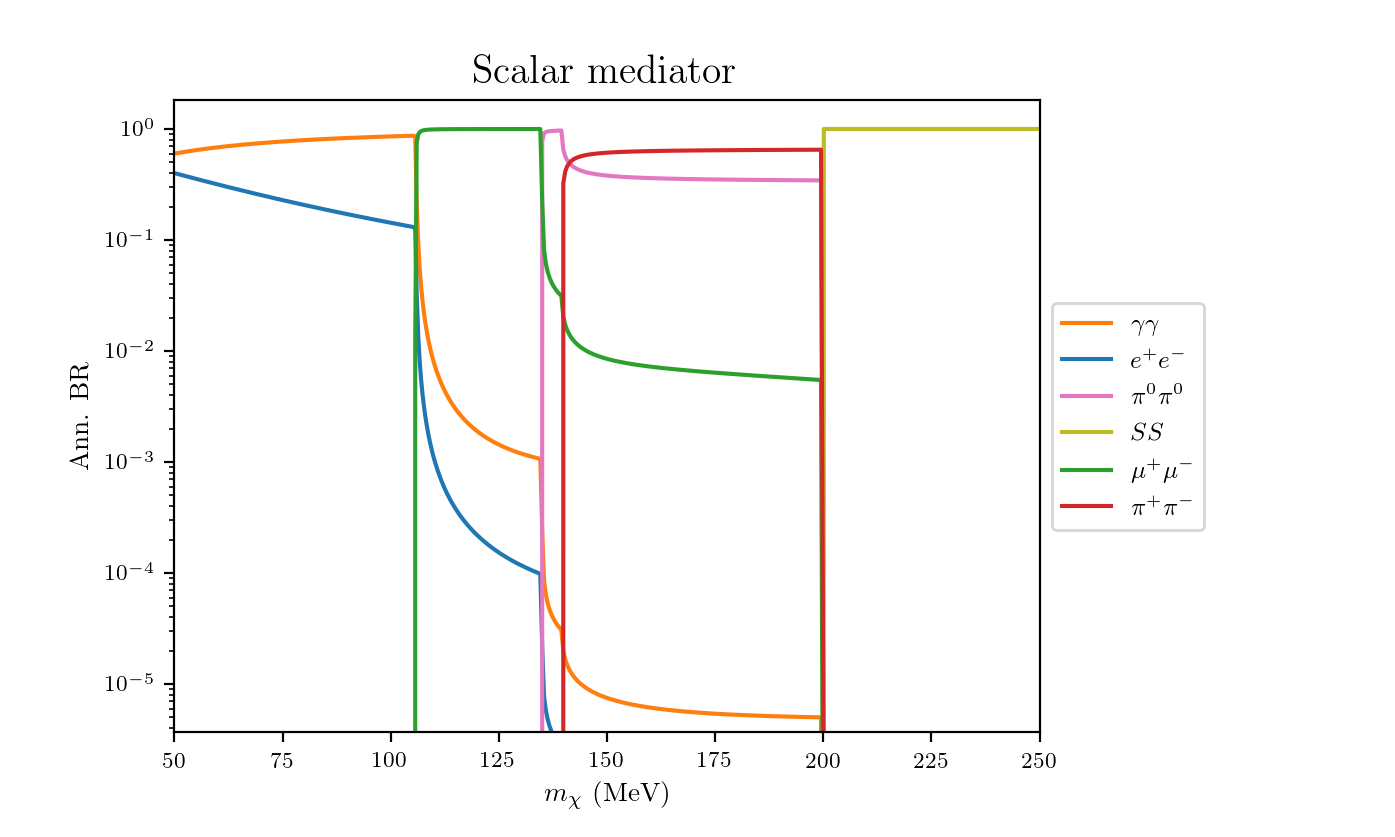

Widget Javascript not detected.  It may not be installed or enabled properly.


<function __main__.<lambda>>

In [4]:
fig = plt.figure(figsize=(base_fig_dim, 0.6 * base_fig_dim))
ax_sm = fig.add_subplot(1, 1, 1)

# Initialize
bfs_init = get_bfs(sm)
sm_curves = plot_bfs(ax_sm, bfs_init)

# Format
ax_sm.set_xlim(mxs[[0, -1]])
ax_sm.set_yscale("log")
ax_sm.set_xlabel(r"$m_\chi$ (MeV)")
ax_sm.set_ylabel("Ann. BR")
plt.title("Scalar mediator")
# Put a legend to the right of the current axis
box = ax_sm.get_position()
ax_sm.set_position([box.x0, box.y0, box.width * 0.8, box.height])
lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set up sliders
interact(lambda ms, gsxx, gsff, gsGG, gsFF, lam: update_scalar(ms, gsxx, gsff,
                                                               gsGG, gsFF, lam,
                                                               sm, sm_curves,
                                                               fig),
         ms=widgets.FloatSlider(min=0, max=250, step=1, value=200.),
         gsxx=widgets.FloatSlider(min=-1, max=1, step=0.01, value=1.),
         gsff=widgets.FloatSlider(min=-1, max=1, step=0.01, value=1.),
         gsGG=widgets.FloatSlider(min=-1, max=1, step=0.01, value=1.),
         gsFF=widgets.FloatSlider(min=-1, max=1, step=0.01, value=1.),
         lam=widgets.FloatSlider(min=0, max=246e3, step=1, value=400.))

## Vector

In [5]:
vm = VectorMediator(1e2, 1e3, 1., 1., 1., 1., 1., 1.)

def update_vector(mv, gvxx, gvuu, gvdd, gvee, gvmumu, th, curves, fig):
    # Update parameters
    th.mv = mv
    th.gvxx = gvxx
    th.gvuu = gvuu
    th.gvdd = gvdd
    th.gvee = gvee
    th.gvmumu = gvmumu
    
    # Get new branching fractions
    bfs = get_bfs(th)
    
    # Plot them
    for fs in th.list_annihilation_final_states():
        curves[fs].set_ydata(bfs[fs])

    fig.canvas.draw()

<IPython.core.display.Javascript object>


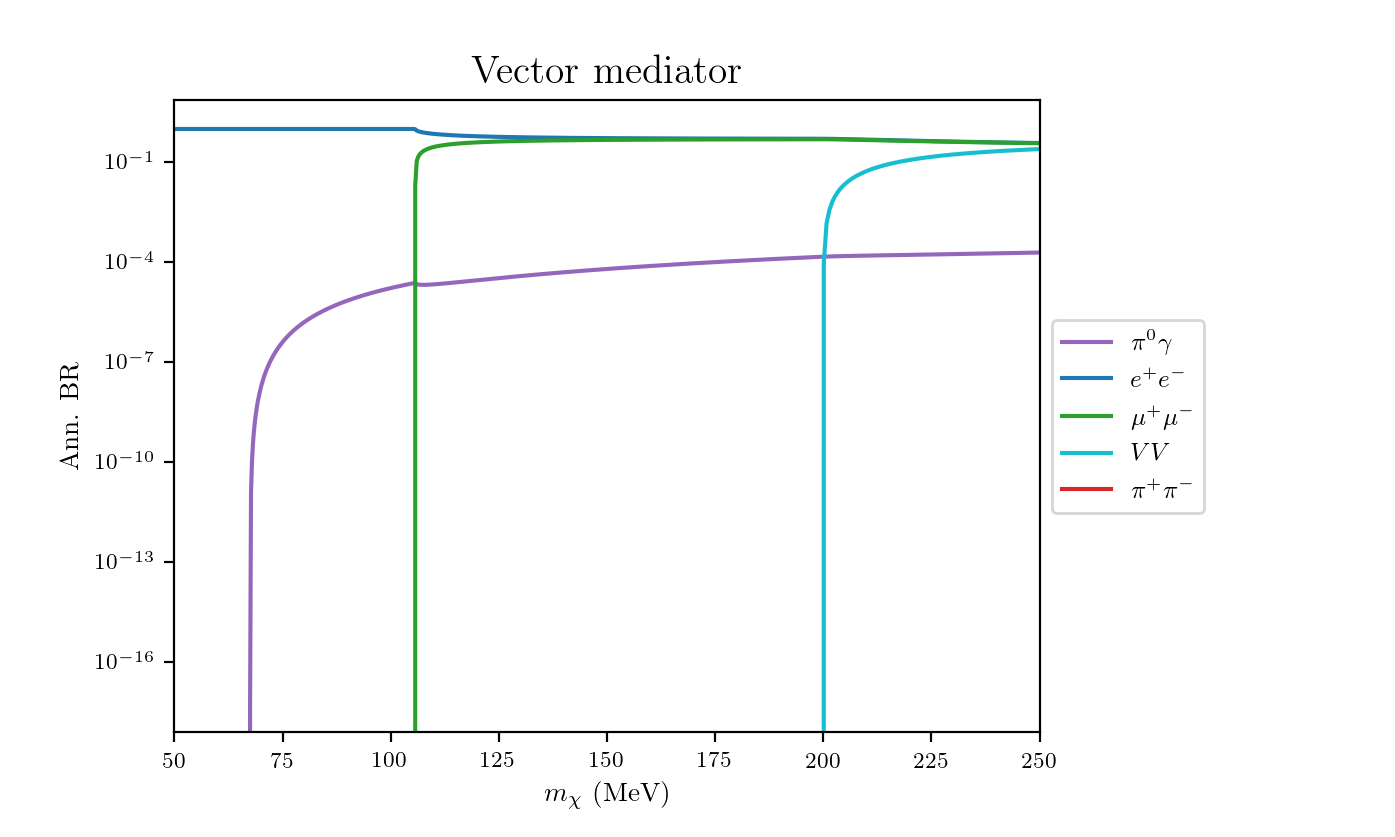

Widget Javascript not detected.  It may not be installed or enabled properly.


<function __main__.<lambda>>

In [6]:
fig = plt.figure(figsize=(base_fig_dim, 0.6 * base_fig_dim))
ax_vm = fig.add_subplot(1, 1, 1)

# Initialize
bfs_init = get_bfs(vm)
vm_curves = plot_bfs(ax_vm, bfs_init)

# Format
ax_vm.set_xlim(mxs[[0, -1]])
ax_vm.set_yscale("log")
ax_vm.set_xlabel(r"$m_\chi$ (MeV)")
ax_vm.set_ylabel("Ann. BR")
ax_vm.set_title("Vector mediator")
# Put a legend to the right of the current axis
box = ax_vm.get_position()
ax_vm.set_position([box.x0, box.y0, box.width * 0.8, box.height])
lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set up sliders
interact(lambda mv, gvxx, gvuu, gvdd, gvee, gvmumu: update_vector(mv, gvxx, gvuu,
                                                                  gvdd, gvee,
                                                                  gvmumu, vm,
                                                                  vm_curves, fig),
         mv=widgets.FloatSlider(min=0, max=250, step=1, value=200.),
         gvxx=widgets.FloatSlider(min=-1, max=1, step=0.01, value=1.),
         gvuu=widgets.FloatSlider(min=-1, max=1, step=0.01, value=1.),
         gvdd=widgets.FloatSlider(min=-1, max=1, step=0.01, value=1.),
         gvee=widgets.FloatSlider(min=-1, max=1, step=0.01, value=1.),
         gvmumu=widgets.FloatSlider(min=-1, max=1, step=0.01, value=1.))